In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [87]:
from sqlite3 import connect

with connect('../db.sqlite3') as conn:
    query = """
    SELECT
        ro.*,
        roi.*,
        rp.*
    FROM
        restaurant_order ro
    JOIN
        restaurant_orderitem roi ON ro.id = roi.order_id
    JOIN
        restaurant_product rp ON roi.product_id = rp.id;
    """
    
    data_from_sql = pd.read_sql_query(query, conn)
    
    data_from_sql.to_csv('combined_data.csv', index=False)
    df = pd.read_csv('combined_data.csv')

# Cleaning data
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.drop(columns=['id', 'id.1', 'id.2', 'order_id', 'product_id'], inplace=True)


if len(df) == 74818:
    print('DataFrame has the correct number of rows: 74818')
else:
    print(f'DataFrame row count mismatch: {len(df)} rows found.')
df

DataFrame has the correct number of rows: 74818


,quantity,price,name
datetime,,,
2019-08-03 20:25:00,2,0.80,Plain Papadum
2019-08-03 20:25:00,1,12.95,King Prawn Balti
2019-08-03 20:25:00,1,2.95,Garlic Naan
2019-08-03 20:25:00,1,3.95,Mushroom Rice
2019-08-03 20:25:00,1,8.95,Paneer Tikka Masala
...,...,...,...
2016-05-18 18:53:00,2,17.95,House Red wine 75cl
2016-05-14 19:28:00,2,17.95,House Red wine 75cl
2016-05-10 13:18:00,2,17.95,House Red wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

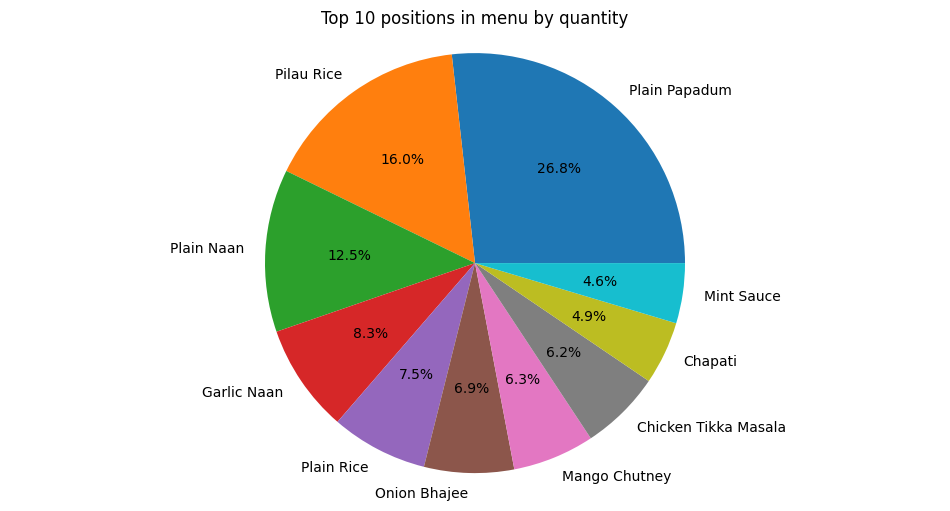

In [91]:
top_10_sold_products = df.groupby('name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(10)

labels = top_10_sold_products['name']
sizes = top_10_sold_products['quantity']

fig, ax = plt.subplots(figsize=(12, 6))

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Top 10 positions in menu by quantity')
ax.axis('equal')

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

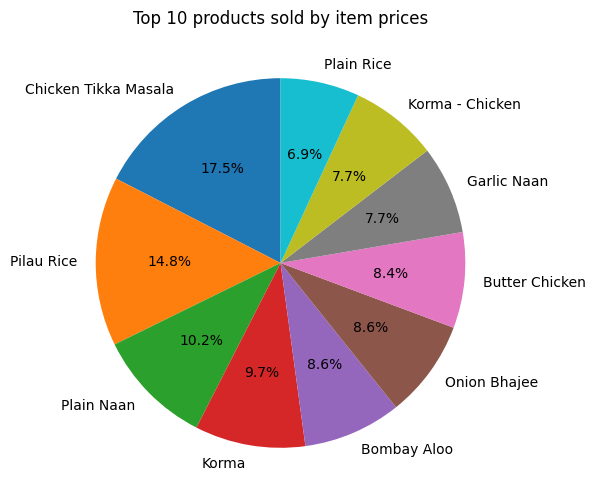

In [94]:
df['item price'] = df['price'] * df['quantity']

top_10_by_price = df.groupby('name')['item price'].sum().reset_index().sort_values(by='item price', ascending=False).head(10)
labels = top_10_by_price['name']
sizes = top_10_by_price['item price']

fig, ax = plt.subplots(figsize=(12, 6))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Top 10 products sold by item prices')

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

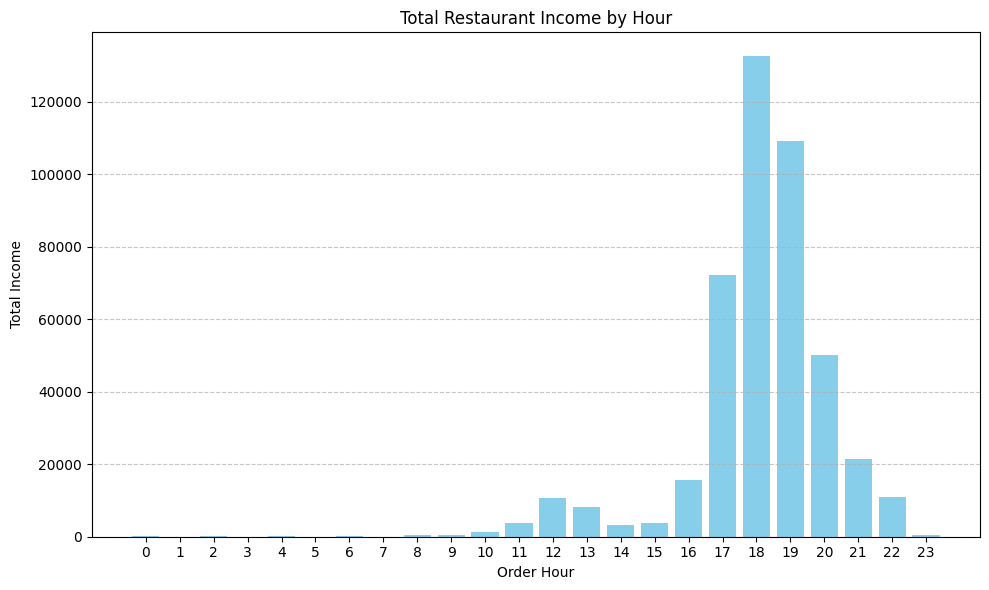

In [119]:
df['order hour'] = df.index.hour
income_by_hour = df.groupby('order hour')['item price'].sum()

plt.figure(figsize=(10, 6))
plt.bar(income_by_hour.index, income_by_hour.values, color='skyblue')
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Hour')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

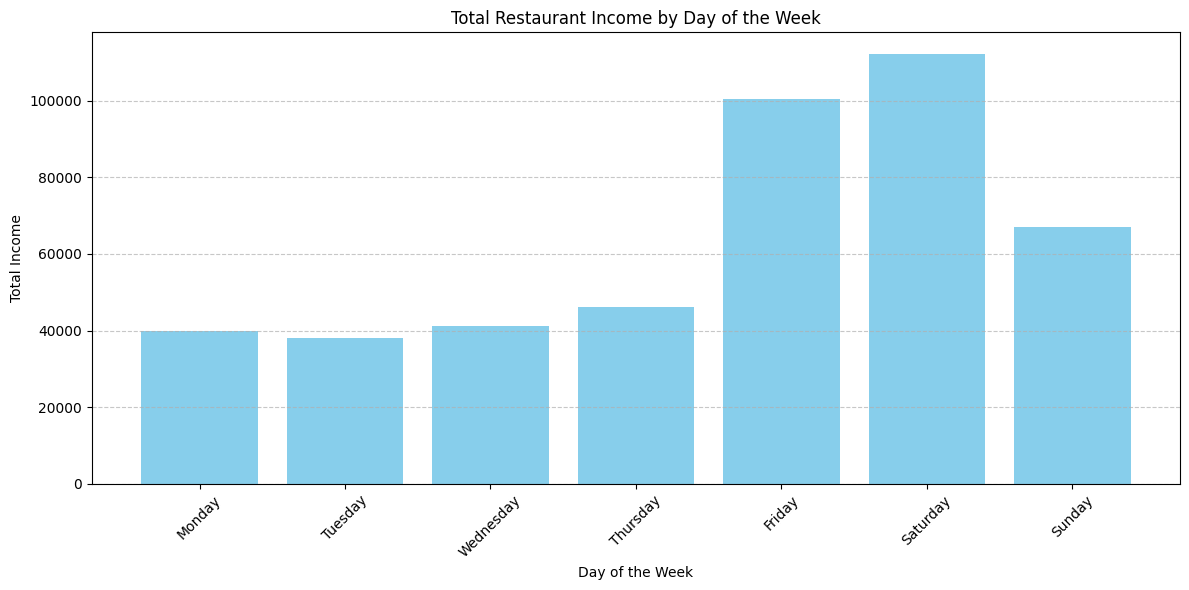

In [126]:
df['day of week'] = df.index.day_name()
income_by_day = df.groupby('day of week')['item price'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
income_by_day = income_by_day.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(income_by_day.index, income_by_day.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()